In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
# Construct the file path using pathlib
file_path = Path('data/data_mb_all_years') / f'2021.csv'
csv = pd.read_csv(file_path)

In [3]:
csv

,S_Seker,MisparMb,Hodesh_Hakira,Shnat_Hakira,Quarter,Weight,Nefashot,NefeshStandartit,Mefarnesim,Nefashot0_4,...,c34,c35,c36,c37,c38,c39,RamatDatiyut,Sex_RMB,MaamadRMB,Religion
0,2021,28106,1,2021,1,383.712,2,2.00,0,NaN,...,0,305,1416,1981,596,6796,1,2,3,1
1,2021,28107,1,2021,1,114.092,1,1.25,0,NaN,...,52,305,520,1525,2831,900,1,2,3,1
2,2021,28108,2,2021,1,195.015,9,5.60,1,4.0,...,2421,0,510,447,2393,562,4,2,1,1
3,2021,28109,1,2021,1,755.693,2,2.00,0,NaN,...,186,0,563,1,176,0,3,2,3,1
4,2021,28110,1,2021,1,527.768,2,2.00,1,NaN,...,463,0,1403,112,46,0,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6052,2021,53760,2,2022,4,182.102,6,4.25,2,1.0,...,0,612,2103,2364,3088,21399,3,2,1,1
6053,2021,53762,1,2022,4,278.277,7,4.75,1,2.0,...,0,613,833,1487,89,644,4,2,2,1
6054,2021,58002,8,2021,3,604.582,3,2.65,0,NaN,...,0,0,141,0,617,0,2,1,3,3
6055,2021,58031,1,2022,4,429.712,3,2.65,1,NaN,...,681,0,863,248,340,52,2,2,1,1


In [4]:
incomes = pd.DataFrame()

In [5]:
# Organize religions and religioness in lists
religions = ['Yehudi', 'Notzri', 'Muslemi', 'Druzi', 'Aher']
religion_mapping = {i: r for i, r in enumerate(religions, 1)}
religiosity_levels = ['Hiloni', 'Masorti', 'Dati', 'Haredi', 'Meorav', 'Aher']
religiosity_levels_mapping = {i: rl for i, rl in enumerate(religiosity_levels, 1)}
religion_mapping

{1: 'Yehudi', 2: 'Notzri', 3: 'Muslemi', 4: 'Druzi', 5: 'Aher'}

In [6]:
# fill incomes Data frame
cols_dict = {
    'mispar_mb':'MisparMb', # מספר משק בית
    'weight':'Weight', # אומדן משקל
    'religion':'Religion', # דת
    'religiosity_level':'RamatDatiyut', # רמת דתיות
    'nefashot':'Nefashot', # נפשות
    'asiron':'Decile', # עשירון
    'bruto_income':'i1Kaspit', # ברוטו
    'total_allowances':'i14', # הכנסה מקצבאות
    }

for col, csv_col in cols_dict.items():
    incomes[col] = csv[csv_col]

incomes['religion_name'] = incomes['religion'].replace(religion_mapping)
incomes['allowances_as_percentage'] = (incomes['total_allowances'] / incomes['bruto_income']) * 100

incomes = incomes[pd.notna(incomes['allowances_as_percentage'])]

In [7]:
incomes

,mispar_mb,weight,religion,religiosity_level,nefashot,asiron,bruto_income,total_allowances,religion_name,allowances_as_percentage
0,28106,383.712,1,1,2,10,34922,4467,Yehudi,12.791364
1,28107,114.092,1,1,1,10,12182,12182,Yehudi,100.000000
2,28108,195.015,1,4,9,2,13216,6046,Yehudi,45.747579
3,28109,755.693,1,3,2,1,3249,3086,Yehudi,94.983072
4,28110,527.768,1,2,2,4,3921,2051,Yehudi,52.308085
...,...,...,...,...,...,...,...,...,...,...
6052,53760,182.102,1,3,6,10,75968,5373,Yehudi,7.072715
6053,53762,278.277,1,4,7,1,10941,4833,Yehudi,44.173293
6054,58002,604.582,3,2,3,1,4398,4398,Muslemi,100.000000
6055,58031,429.712,1,2,3,3,7712,0,Yehudi,0.000000


In [8]:
from funcs import weighted_average

def w_avg(col):
    return weighted_average(incomes, col, 'weight')

# avg what needs to be avg, count all groups.
cols_to_avg = ['nefashot','asiron','bruto_income','total_allowances','allowances_as_percentage']
cols_agg = {
    col: lambda x: w_avg(x) for col in cols_to_avg
}
cols_agg['mispar_mb'] = 'count'

# Calculate means of every religion
religions_means = incomes.groupby('religion_name').agg(cols_agg).reset_index()

# Rename the 'mispar_mb' column to 'count' for clarity
religions_means.rename(columns={'mispar_mb': 'mb_count'}, inplace=True)

religions_means.sort_values('religion_name', ascending=False, inplace=True)

# Group by 'religion' and 'religiosity_level' and calculate the average and count for each group
grouped = incomes[incomes['religiosity_level'] < 5].groupby(['religion_name', 'religiosity_level']).agg(cols_agg).reset_index()

# Rename the 'mispar_mb' column to 'count' for clarity
grouped.rename(columns={'mispar_mb': 'mb_count'}, inplace=True)

# too little data
f_grouped = grouped[grouped['mb_count'] >= 5]

f_grouped

,religion_name,religiosity_level,nefashot,asiron,bruto_income,total_allowances,allowances_as_percentage,mb_count
0,Aher,1,2.599344,4.936447,17054.841300,2606.444375,30.595470,97
3,Druzi,1,3.839970,5.067816,19040.843570,1646.231616,12.693291,39
4,Druzi,2,4.204268,3.273289,14033.120290,2231.243616,29.213296,46
5,Druzi,3,2.929737,3.348207,8344.986958,1583.460685,34.950809,24
6,Muslemi,1,3.791537,3.512415,15066.213429,2274.281613,37.098629,38
7,Muslemi,2,4.549450,2.825389,12675.570672,2472.130407,32.354782,355
8,Muslemi,3,4.136575,3.083374,12818.189878,3199.219839,44.943029,277
10,Notzri,1,2.583403,4.207574,13753.437798,2699.245221,36.506642,101
11,Notzri,2,2.918059,4.009475,13072.807671,3006.828670,41.765387,82
12,Notzri,3,2.782198,3.800464,9999.365002,4077.578529,59.675612,8


Text(0.75, 0.97, 'p: people in Meshek Bait\na: Averege Asiron')

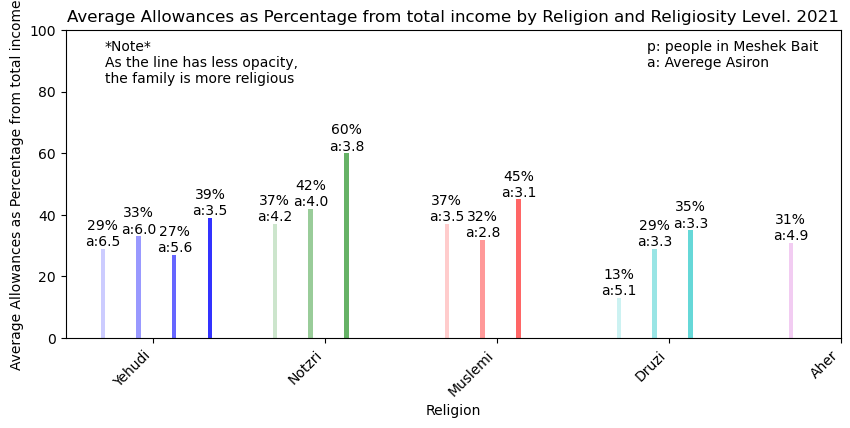

In [9]:

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 4))

# Define colors for different religiosity levels
colors = ['b', 'g', 'r', 'c', 'm', 'y']

width = 0.1  # the width of the bars
multiplier = 0

religion_names = religions_means['religion_name'].unique()

# Iterate through each religion and plot bars for each religiosity level
for religion, color in zip(religions_means['religion_name'], colors):
    subset = f_grouped[f_grouped['religion_name'] == religion]
    offset = width * multiplier
    rects = ax.bar(offset + (subset['religiosity_level']/1.2), subset['allowances_as_percentage'].round(), width, color=color)
#     ax.bar_label(rects, padding=1)
    multiplier += 40
    # Define custom labels for each bar
    for i, rect in enumerate(rects):
        asi = round(subset.iloc[i]['asiron'], 1)
        label = f'{int(rect.get_height())}%\na:{asi}'
        x = rect.get_x() + rect.get_width() / 2
        y = rect.get_height()
        ax.text(x, y, label, ha='center', va='bottom')
        rect.set_alpha(i/5 + 0.2)
                
# Set the x-axis labels to be religion names
ax.set_xticks([i*4 + 2 for i in range(len(religion_names))])
ax.set_xticklabels(religion_names, rotation=45, ha="right")

# add limit
plt.ylim(top=100)

# Set labels and title
ax.set_xlabel('Religion')
ax.set_ylabel('Average Allowances as Percentage from total income')
ax.set_title('Average Allowances as Percentage from total income by Religion and Religiosity Level. 2021')

note1 = '*Note*\nAs the line has less opacity,\nthe family is more religious'
ax.text(0.05, 0.97, note1, transform=ax.transAxes, fontsize=10, verticalalignment='top', backgroundcolor='white')

note2 = 'p: people in Meshek Bait\na: Averege Asiron'
ax.text(0.75, 0.97, note2, transform=ax.transAxes, fontsize=10, verticalalignment='top', backgroundcolor='white')

In [11]:
incomes

,mispar_mb,weight,religion,religiosity_level,nefashot,asiron,bruto_income,total_allowances,religion_name,allowances_as_percentage
0,28106,383.712,1,1,2,10,34922,4467,Yehudi,12.791364
1,28107,114.092,1,1,1,10,12182,12182,Yehudi,100.000000
2,28108,195.015,1,4,9,2,13216,6046,Yehudi,45.747579
3,28109,755.693,1,3,2,1,3249,3086,Yehudi,94.983072
4,28110,527.768,1,2,2,4,3921,2051,Yehudi,52.308085
...,...,...,...,...,...,...,...,...,...,...
6052,53760,182.102,1,3,6,10,75968,5373,Yehudi,7.072715
6053,53762,278.277,1,4,7,1,10941,4833,Yehudi,44.173293
6054,58002,604.582,3,2,3,1,4398,4398,Muslemi,100.000000
6055,58031,429.712,1,2,3,3,7712,0,Yehudi,0.000000


In [42]:
from funcs import weighted_average

def w_avg(col):
    return weighted_average(incomes, col, 'weight')

# avg what needs to be avg, count all groups.
cols_to_avg = ['nefashot','asiron','bruto_income','total_allowances','allowances_as_percentage']
cols_agg = {
    col: lambda x: w_avg(x) for col in cols_to_avg
}
cols_agg['mispar_mb'] = 'count'
cols_agg['weight'] = 'sum'

# Calculate means of every religion
religions_means = incomes.groupby('religion_name').agg(cols_agg).reset_index()

# Rename the 'mispar_mb' column to 'count' for clarity
religions_means.rename(columns={'mispar_mb': 'mb_count'}, inplace=True)

religions_means.sort_values('religion_name', ascending=False, inplace=True)

# Group by 'religion' and 'religiosity_level' and calculate the average and count for each group
grouped = incomes[incomes['religiosity_level'] < 5].groupby(['religion_name', 'religiosity_level']).agg(cols_agg).reset_index()

# Rename the 'mispar_mb' column to 'count' for clarity
grouped.rename(columns={'mispar_mb': 'mb_count'}, inplace=True)

# too little data
grouped

,religion_name,religiosity_level,nefashot,asiron,bruto_income,total_allowances,allowances_as_percentage,mb_count,weight
0,Aher,1,2.599344,4.936447,17054.841300,2606.444375,30.595470,97,52204.969
1,Aher,2,3.506618,5.013236,16077.647893,12774.499300,82.946210,2,1606.254
2,Aher,3,4.732862,3.465723,16057.671321,93.498402,1.269841,2,707.626
3,Druzi,1,3.839970,5.067816,19040.843570,1646.231616,12.693291,39,16247.857
4,Druzi,2,4.204268,3.273289,14033.120290,2231.243616,29.213296,46,17757.285
5,Druzi,3,2.929737,3.348207,8344.986958,1583.460685,34.950809,24,8730.522
6,Muslemi,1,3.791537,3.512415,15066.213429,2274.281613,37.098629,38,26822.333
7,Muslemi,2,4.549450,2.825389,12675.570672,2472.130407,32.354782,355,194700.330
8,Muslemi,3,4.136575,3.083374,12818.189878,3199.219839,44.943029,277,114088.268
9,Muslemi,4,2.000000,3.000000,3750.000000,3750.000000,100.000000,1,90.220


In [192]:
from funcs import weighted_average

df = grouped

def w_avg(col):
    return weighted_average(df, col, 'weight')

# Assuming your data is stored in a DataFrame named 'df'
# Mapping the desired groupings
group_mapping = {
    ('Aher', 1): 'Aher all',
    ('Aher', 2): 'Aher all',
    ('Aher', 3): 'Aher all',
    ('Muslemi', 1): 'Muslemi Hiloni',
    ('Muslemi', 2): 'Muslemi Masorti',
    ('Muslemi', 3): 'Muslemi Dati',
    ('Muslemi', 4): 'Muslemi Dati',
    ('Notzri', 1): 'Notzri Hiloni',
    ('Notzri', 2): 'Notzri Masorti/Dati',
    ('Notzri', 3): 'Notzri Masorti/Dati',
    ('Druzi', 1): 'Druzi Hiloni',
    ('Druzi', 2): 'Druzi Masorti',
    ('Druzi', 3): 'Druzi Dati',
    ('Yehudi', 1): 'Yehudi Hiloni',
    ('Yehudi', 2): 'Yehudi Masorti',
    ('Yehudi', 3): 'Yehudi Dati',
    ('Yehudi', 4): 'Yehudi Haredi',
}

# Function to apply the group mapping
def map_religiosity_level(row):
    key = (row['religion_name'], row['religiosity_level'])
    if key in group_mapping:
        return group_mapping[key]
    return key

# Apply the mapping function to create a new column
df['grouped_religiosity'] = df.apply(map_religiosity_level, axis=1)


# avg what needs to be avg, count all groups.
cols_to_avg = ['nefashot','asiron','bruto_income','total_allowances','allowances_as_percentage']
cols_agg = {
    col: lambda x: w_avg(x) for col in cols_to_avg
}
cols_agg['mb_count'] = 'sum'
cols_agg['weight'] = 'sum'
cols_agg['religion_name'] = 'first'

# Group by the new column and aggregate the data
grouped_df = df.groupby('grouped_religiosity').agg(cols_agg).reset_index()

grouped_df['grouped_religiosity'] = grouped_df['grouped_religiosity'].apply(lambda x: x.split(' ')[1])

# remove Aher
grouped_df = grouped_df[grouped_df['religion_name'] != 'Aher']

grouped_df

,grouped_religiosity,nefashot,asiron,bruto_income,total_allowances,allowances_as_percentage,mb_count,weight,religion_name
1,Dati,2.929737,3.348207,8344.986958,1583.460685,34.950809,24,8730.522,Druzi
2,Hiloni,3.839970,5.067816,19040.843570,1646.231616,12.693291,39,16247.857,Druzi
3,Masorti,4.204268,3.273289,14033.120290,2231.243616,29.213296,46,17757.285,Druzi
4,Dati,4.134887,3.083308,12811.024499,3199.655047,44.986534,278,114178.488,Muslemi
5,Hiloni,3.791537,3.512415,15066.213429,2274.281613,37.098629,38,26822.333,Muslemi
6,Masorti,4.549450,2.825389,12675.570672,2472.130407,32.354782,355,194700.330,Muslemi
7,Hiloni,2.583403,4.207574,13753.437798,2699.245221,36.506642,101,54722.246,Notzri
8,Masorti/Dati,2.907469,3.993183,12833.236267,3090.292419,43.161469,90,33738.023,Notzri
9,Dati,3.588229,5.596149,20681.908545,3034.197909,26.809386,723,342245.372,Yehudi
10,Haredi,5.177154,3.539780,14977.960563,3997.633191,39.046551,550,198584.489,Yehudi


In [148]:
sns.set(style="whitegrid", palette="pastel")

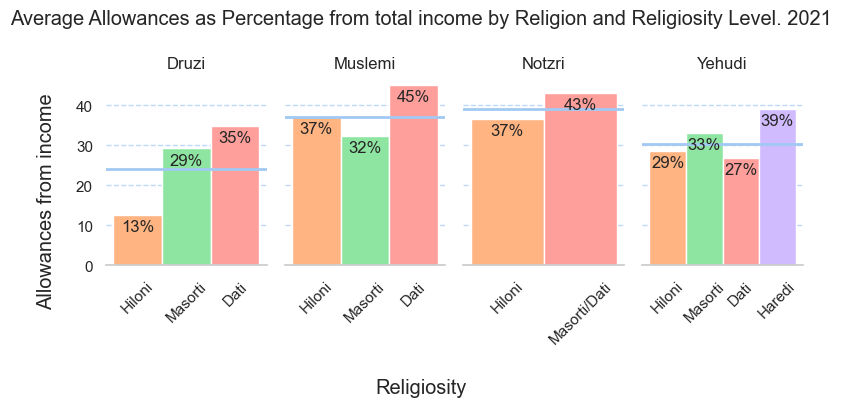

In [340]:
from funcs import weighted_average

def w_avg(df, col):
    return weighted_average(df, col, 'weight')

# Assuming your data is stored in a DataFrame named 'grouped_df'
religions = grouped_df['religion_name'].unique()

# Define custom sort order
custom_order = ['Hiloni', 'Masorti', 'Masorti/Dati', 'Dati', 'Haredi', 'all']

# Define bar width
bar_width = 1

palette = sns.color_palette('pastel')
color_dict = {
    'all': palette[0],
    'Hiloni': palette[1],
    'Masorti': palette[2],
    'Masorti/Dati': palette[3],
    'Dati': palette[3],
    'Haredi': palette[4],
}

# Plotting subplots with shared y-axis
fig, axes = plt.subplots(1, len(religions), figsize=(8, 4), sharey=True)

for i, ax in enumerate(axes.flatten()):
    grouped_df['grouped_religiosity'] = pd.Categorical(grouped_df['grouped_religiosity'], categories=custom_order, ordered=True)
    dfi = grouped_df[grouped_df['religion_name'] == religions[i]]
    dfi = dfi.sort_values('grouped_religiosity')
    positions = np.arange(len(dfi))  # Set positions for bars
    
    for j, (_, data) in enumerate(dfi.iterrows()):
        ax.bar(positions[j], data['allowances_as_percentage'], width=bar_width, color=color_dict[data['grouped_religiosity']])
        
        # Add labels above the bars
        ax.text(j * bar_width, data['allowances_as_percentage'] - 4, f"{data['allowances_as_percentage']:.0f}%", ha='center')
    
    # avg what needs to be avg, count all groups.
    cols_agg = {
        'allowances_as_percentage': lambda x: w_avg(df=dfi ,col=x)
    }
    avg_df = dfi.groupby('religion_name').agg(cols_agg)
    avg_line = avg_df['allowances_as_percentage'].mean()
    ax.axhline(y=avg_line, color=palette[0], linestyle='-', linewidth=2)
#     ax.text(0, avg_line + 1, f"{avg_line:.0f}%", ha='right')
    
    
    ax.set_title(religions[i])
    ax.set_xticks(positions)
    ax.set_xticklabels(dfi['grouped_religiosity'], rotation=45)  # Set x-axis labels
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    # Styles
    ax.yaxis.grid(True, linestyle='--', alpha=0.7, color=sns.color_palette('pastel')[0])  # Use the color from the palette
    ax.xaxis.grid(False)
    
# Set labels and title
fig.suptitle('Average Allowances as Percentage from total income by Religion and Religiosity Level. 2021')
fig.supxlabel('Religiosity')
fig.supylabel('Allowances from income')

plt.tight_layout()
plt.show()

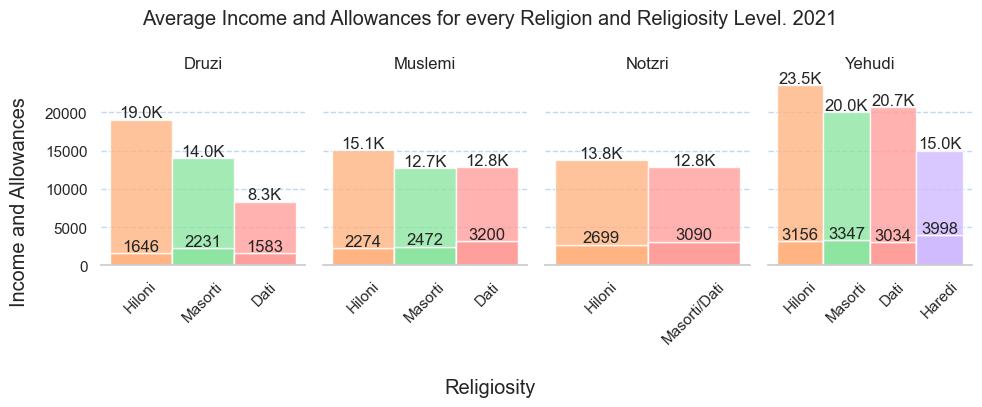

In [302]:
# Assuming your data is stored in a DataFrame named 'grouped_df'
religions = grouped_df['religion_name'].unique()

# Define custom sort order
custom_order = ['Hiloni', 'Masorti', 'Masorti/Dati', 'Dati', 'Haredi', 'all']

# Define bar width
bar_width = 1

palette = sns.color_palette('pastel')
color_dict = {
    'all': palette[0],
    'Hiloni': palette[1],
    'Masorti': palette[2],
    'Masorti/Dati': palette[3],
    'Dati': palette[3],
    'Haredi': palette[4],
}

# Plotting subplots with shared y-axis
fig, axes = plt.subplots(1, len(religions), figsize=(10, 4), sharey=True)
bottom = np.zeros(3)

for i, ax in enumerate(axes.flatten()):
    grouped_df['grouped_religiosity'] = pd.Categorical(grouped_df['grouped_religiosity'], categories=custom_order, ordered=True)
    dfi = grouped_df[grouped_df['religion_name'] == religions[i]]
    dfi = dfi.sort_values('grouped_religiosity')
    positions = np.arange(len(dfi))  # Set positions for bars
    
    for j, (_, data) in enumerate(dfi.iterrows()):
        tot_allow = data['total_allowances']
        bruto = data['bruto_income']
        ax.bar(positions[j], tot_allow, bottom=bottom, width=bar_width, color=color_dict[data['grouped_religiosity']], alpha=1)
        ax.bar(positions[j], bruto - tot_allow, bottom=tot_allow, width=bar_width, color=color_dict[data['grouped_religiosity']], alpha=0.8)
#         bottom += data['bruto_income']
        # Add labels above the bars
        ax.text(j * bar_width, tot_allow + 300, f"{(tot_allow):.0f}", ha='center')
        ax.text(j * bar_width, bruto + 300, f"{(bruto/1000):.1f}K", ha='center')
    
    ax.set_title(religions[i])
    ax.set_xticks(positions)
    ax.set_xticklabels(dfi['grouped_religiosity'], rotation=45)  # Set x-axis labels
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    # Styles
    ax.yaxis.grid(True, linestyle='--', alpha=0.7, color=sns.color_palette('pastel')[0])  # Use the color from the palette
    ax.xaxis.grid(False)
    
# Set labels and title
fig.suptitle('Average Income and Allowances for every Religion and Religiosity Level. 2021')
fig.supxlabel('Religiosity')
fig.supylabel('Income and Allowances')    

plt.tight_layout()
plt.show()
